In [116]:

import sys
import glob
import os
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

In [119]:
def read_trace(filename):
    of = open(filename)
    throughput = float(of.readline().strip())
    percents, latencies = [], []
    for cdf_line in of.readlines():
        cdf_line = cdf_line.split(",")
        latency = long(cdf_line[0].strip())
        percent = float(cdf_line[1].strip())
        percents.append(percent)
        latencies.append(latency / 1000000.0)
    df = pd.DataFrame({'pct': percents, 'lat': latencies})
    return throughput, df

In [120]:
def read_traces(filenames):
    iopss = []
    dfs = []
    for filename in filenames:
        iops, df = read_trace(filename)
        iopss.append(iops)
        dfs.append(df)
    return iopss, dfs

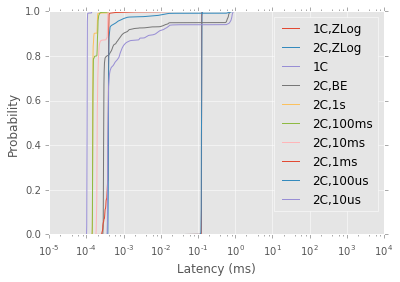

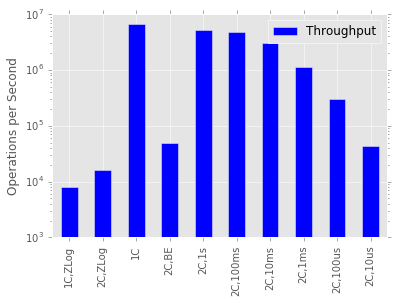

In [149]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_xlabel('Latency (ms)')
ax.set_ylabel('Probability')

iopss = []

###
iops, cdf = read_trace('1cl_zlogseqr_60s.csv')
iopss.append(('1C,ZLog', iops))
ax.plot(cdf.lat, cdf.pct, label='1C,ZLog')

###
iops, cdfs = read_traces(glob.glob('2cl_*_zlogseqr_60s.csv'))
iopss.append(('2C,ZLog', sum(iops)))
ax.plot(cdfs[0].lat, cdfs[0].pct, label='2C,ZLog')

###
iops, cdf = read_trace('1cl_lseek_60s.csv')
iopss.append(('1C', iops))
ax.plot(cdf.lat, cdf.pct, label='1C')

###
iops, cdfs = read_traces(glob.glob('2cl_*_0delay.csv'))
iopss.append(('2C,BE', sum(iops)))
ax.plot(cdfs[0].lat, cdfs[0].pct, label='2C,BE')

###
iops, cdfs = read_traces(glob.glob('2cl_*_1000delay.csv'))
iopss.append(('2C,1s', sum(iops)))
ax.plot(cdfs[0].lat, cdfs[0].pct, label='2C,1s')

###
iops, cdfs = read_traces(glob.glob('2cl_*_100delay.csv'))
iopss.append(('2C,100ms', sum(iops)))
ax.plot(cdfs[0].lat, cdfs[0].pct, label='2C,100ms')

###
iops, cdfs = read_traces(glob.glob('2cl_*_10delay.csv'))
iopss.append(('2C,10ms', sum(iops)))
ax.plot(cdfs[0].lat, cdfs[0].pct, label='2C,10ms')

###
iops, cdfs = read_traces(glob.glob('2cl_*_1delay.csv'))
iopss.append(('2C,1ms', sum(iops)))
ax.plot(cdfs[0].lat, cdfs[0].pct, label='2C,1ms')

###
iops, cdfs = read_traces(glob.glob('2cl_*_0.1delay.csv'))
iopss.append(('2C,100us', sum(iops)))
ax.plot(cdfs[0].lat, cdfs[0].pct, label='2C,100us')

###
iops, cdfs = read_traces(glob.glob('2cl_*_0.01delay.csv'))
iopss.append(('2C,10us', sum(iops)))
ax.plot(cdfs[0].lat, cdfs[0].pct, label='2C,10us')
ax.legend()
plt.savefig('latency_cdf.png', dpi=300, bbox_inches='tight')

###
df = pd.DataFrame(iopss, columns=['Name', 'Throughput'])
df.set_index('Name', inplace=True)
ax = df.plot.bar(logy=True)
ax.set_ylabel('Operations per Second')
ax.set_xlabel('')
plt.savefig('throughput.png', dpi=300, bbox_inches='tight')